<a href="https://colab.research.google.com/github/Kwamenas/Python/blob/master/ML%20MODEL%20Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: 
We are contracted to build a machine learning model
for ORGLE HOTELS to predict customers who wil cancel
their booking

We need to clean and explore the data before we start our analysis.

Also i will advice we segment our data into 
1. Categorical
2. Numerical 
3. Ordinal




In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [ ]:
hotel_df=pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03




#EDA

Let's Explore the data and ask come questions before we go into the ML



In [ ]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#let's see if there are some null values then we can explore why

hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

from our checks we can assume
 that the company with null values are individual who booked the hotel

In [ ]:
nan_replacement={'country':"Unknown",'children':0,'agent':0,"company":0}
hotel_df=hotel_df.fillna(nan_replacement)

same assumption is made here, we assuming those with null in agent column means they booked the service by themselve.



In [ ]:
hotel_df['agent'].value_counts()

9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
3.0       1336
37.0      1230
19.0      1061
40.0      1039
314.0      927
21.0       875
229.0      786
242.0      780
83.0       696
29.0       683
171.0      607
12.0       578
85.0       554
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       450
15.0       402
26.0       401
11.0       395
22.0       382
56.0       375
273.0      349
177.0      347
86.0       338
58.0       335
5.0        330
119.0      304
196.0      301
34.0       294
44.0       292
138.0      287
315.0      284
38.0       274
10.0       260
236.0      247
16.0       246
17.0       241
115.0      225
251.0      220
68.0       211
42.0       211
191.0      198
175.0      195
154.0      193
195.0      193
156.0      190
168.0      184
152.0      183
208.0      173
143.0      172
326.0      165
2.0       

Now let's answer some questions for today


1. let's try and create a column that will take arrival date
2. Let's see what if the time/day difference between arrival and those who cancelled has any relationship


In [ ]:
#first let's convert the month to numeric
#we can use the maping  syntax
from time import strptime
#a='Jul'
#strptime(a,'%b').tm_mon
#[strptime(str(x),'%b').tm_mon for x in hotel_df['arrival_date_month']]

#hotel_df['arrival_date_month'].unique()
mon_num={'January':1, 'February':2, 'March':3, 'April':4, 'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

hotel_df['arr_date_month_num']=hotel_df['arrival_date_month'].map(mon_num)


In [ ]:
hotel_df.head()
#now let's convert them to date
#1. take the cols and place them in one variable
cols=['arrival_date_year','arr_date_month_num','arrival_date_day_of_month']

hotel_df['arrival_date']=hotel_df[cols].apply(lambda x: '-'.join(x.values.astype(str)),axis="columns")

In [ ]:
hotel_df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arr_date_month_num,arrival_date
58310,City Hotel,1,81,2016,October,42,10,1,3,1,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,119.07,0,0,Canceled,2016-10-09,10,2016-10-10


In [ ]:
hotel_df['arrival_date']=pd.to_datetime(hotel_df['arrival_date'])
hotel_df['reservation_status_date']=pd.to_datetime(hotel_df['reservation_status_date'])

#pd.to_datetime(df_bolt_Searches_raw['Date'])

Assumption 2: We are assuming there is a wrong input when we have 0 adults,0 children, 0 babies

This means no one is sleeping in the room booked. We are intrested in the humans here 


In [ ]:
hotel_df_hm=hotel_df.copy()

In [ ]:
#
no_hm=hotel_df_hm[(hotel_df_hm['adults']==0) & (hotel_df_hm['babies']==0)&(hotel_df_hm['children']==0.0)].index


In [ ]:
hotel_df_hm=hotel_df_hm.drop(no_hm,axis=0)

Questions to Answer

1. How many days did it take for customer to cancel
2. Where do the guests come from?
3. How much do guests pay for a room per night?
4. How does the price per night vary over the year?
5. Which are the most busy month?
6. How long do people stay at the hotels?
7. Bookings by market segment
8. How many bookings were canceled?
9. Which month have the highest number of cancelations?
10. Is cancellation rampant on weekdays or weekends
11. For those who cancelled, is it because of price
12. For customers who cancelled, what room and meal 
did they book and how many guest did they have



In [ ]:
hotel_df_hm['days_status_change']=(hotel_df_hm['reservation_status_date']-hotel_df_hm['arrival_date']).dt.days

Text(0.5, 0, 'Days to Cancel')

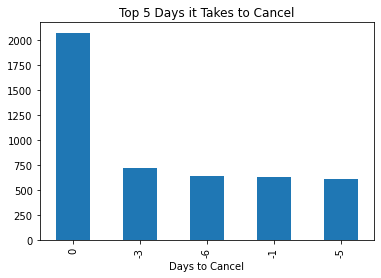

In [ ]:
hotel_df_hm[hotel_df_hm['is_canceled']==1]['days_status_change'].value_counts().head().plot(kind='bar')
plt.title('Top 5 Days it Takes to Cancel')
plt.xlabel('Days to Cancel')

# Which Country are the visitors from?


Now let's segment the data into City Hotels and Resort hotel. Then let's get some partten

In [ ]:
hotel_df_hm['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df_RH=hotel_df_hm[hotel_df_hm['hotel']=='Resort Hotel']
df_CH=hotel_df_hm[hotel_df_hm['hotel']=='City Hotel']

Where do the guests come from?

For both Cancelled and Booked

We will start with Booked first


In [ ]:
BKD_countries_RH=DataFrame(df_RH[df_RH['is_canceled']==0]['country'].value_counts()).reset_index().rename(columns={'index':'country','country':'Population'})
CND_countries_RH=DataFrame(df_RH[df_RH['is_canceled']==1]['country'].value_counts()).reset_index().rename(columns={'index':'country','country':'Population'})
BKD_countries_CH=DataFrame(df_CH[df_CH['is_canceled']==0]['country'].value_counts()).reset_index().rename(columns={'index':'country','country':'Population'})
CND_countries_CH=DataFrame(df_CH[df_CH['is_canceled']==1]['country'].value_counts()).reset_index().rename(columns={'index':'country','country':'Population'})

In [ ]:

fig=px.pie(BKD_countries_RH,values='Population',names='country',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()


In [ ]:
fig=px.pie(CND_countries_RH,values='Population',names='country',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
fig=px.pie(BKD_countries_CH,values='Population',names='country',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
fig=px.pie(CND_countries_CH,values='Population',names='country',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

From our checks Majority of our visitors are from Protugal and Europe at Large.

We are assumming this hotel is in Portugal

# How much do guests pay for a room per night?

In [ ]:
hotel_df_hm.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arr_date_month_num',
       'arrival_date', 'days_status_change'],
      dtype='object')

Average Daily Rate: dividing the sum of all lodging transactions 
by the total number of staying nights

From our first exploration we assumed the hotel is in Portugal.

Portugese use Euro as their currency.

In [ ]:
#Assumption is Kids do not pay for their hotel fee
#so our consideration is only adult and children
BKD_HTL_df=hotel_df_hm[hotel_df_hm['is_canceled']==0]




In [ ]:
BKD_HTL_df['Room_Per_night_fee']=BKD_HTL_df['adr']/(BKD_HTL_df['adults']+ BKD_HTL_df['children'])

<ipython-input-29-1ea24e01f7f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
BKD_HTL_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arr_date_month_num,arrival_date,days_status_change,Room_Per_night_fee
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,2,49.0


In [ ]:
print('average night spending for a room in a Resort Hotel is:{:.2f} Euro'.format(BKD_HTL_df[BKD_HTL_df['hotel']=='Resort Hotel']['Room_Per_night_fee'].mean()))

print('average night spending for a room in a City Hotel is:{:.2f} Euro'.format(BKD_HTL_df[BKD_HTL_df['hotel']!='Resort Hotel']['Room_Per_night_fee'].mean()))

average night spending for a room in a Resort Hotel is:47.49 Euro
average night spending for a room in a City Hotel is:59.27 Euro


Also let's see how much is spending depending on the room and meal

Because in a hotel if a customer will spend it depends on his room or his meal

In [ ]:
RM_MEAL_df=BKD_HTL_df[['hotel','meal','reserved_room_type','Room_Per_night_fee']]

fig = px.box(RM_MEAL_df, x="reserved_room_type", y="Room_Per_night_fee",
             color="hotel",hover_data=['meal'],title="Expenditure per person by room booked and meal eaten")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
RM_MEAL_df.head()

,hotel,meal,reserved_room_type,Room_Per_night_fee
0,Resort Hotel,BB,C,0.0
1,Resort Hotel,BB,C,0.0
2,Resort Hotel,BB,A,75.0
3,Resort Hotel,BB,A,75.0
4,Resort Hotel,BB,A,49.0


# How does the price per night vary over the year?

In [ ]:
year_spend=BKD_HTL_df.groupby('arrival_date_year')['Room_Per_night_fee'].mean()

this shows us that year on year there was an increase in spending by customers.

As of 2017 spending had increased to 9% of 2015 spending.

In [ ]:
px.line(year_spend,x=year_spend.index,y=year_spend.values)

In [ ]:
hotel_df_hm.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arr_date_month_num,arrival_date,days_status_change
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,2


In [ ]:
BKD_HTL_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
Exp_per_month=BKD_HTL_df[['arrival_date_month','hotel','Room_Per_night_fee']].sort_values('arrival_date_month')

Exp_per_month["arrival_date_month"]=pd.Categorical(Exp_per_month["arrival_date_month"],categories=months,ordered=True)

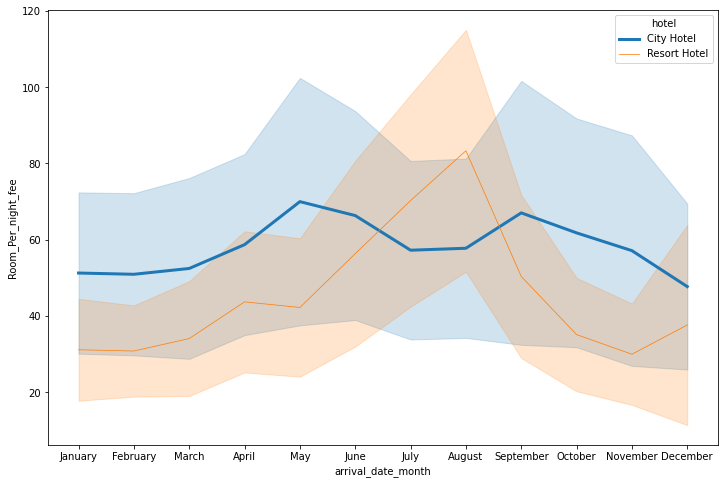

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=Exp_per_month,x="arrival_date_month",y="Room_Per_night_fee",hue="hotel",size="hotel",ci="sd")
plt.show()

From our graph, the month/season Resort Hotel has the most spending is arounf July and August(Summer).

For City Hotel, the season people spend alot is between April/May


# Most Busy Month

Find the most busy month




In [ ]:
guest_month_df=DataFrame(BKD_HTL_df.groupby('arrival_date_month')['hotel'].count())

In [ ]:
guest_month_df=guest_month_df.reset_index()

In [ ]:
guest_month_df=guest_month_df.rename(columns={'hotel':'Guest','arrival_date_month':'month'})

In [ ]:
guest_month_df.head()

,month,Guest
0,April,6560
1,August,8624
2,December,4391
3,February,5359
4,January,4115


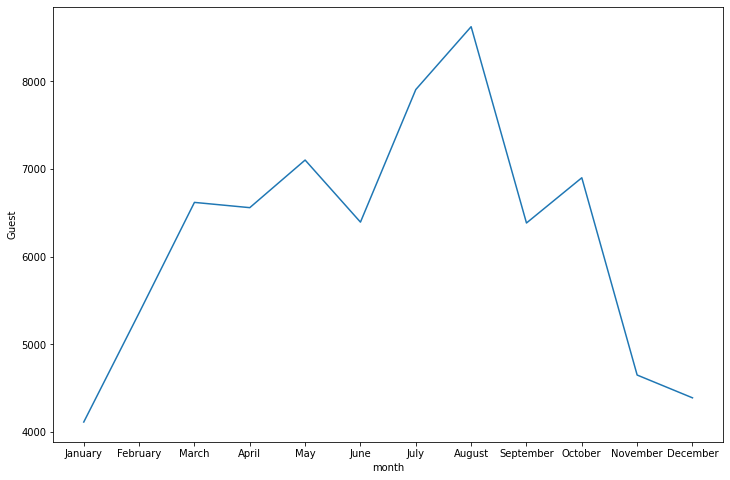

In [ ]:
guest_month_df["month"]=pd.Categorical(guest_month_df["month"],categories=months,ordered=True)

plt.figure(figsize=(12,8))
sns.lineplot(data=guest_month_df,x="month",y="Guest")
plt.show()

In [ ]:
Resort_Hotel_guest=DataFrame(df_RH.groupby(['arrival_date_month'])['hotel'].count())
#df_CH

In [ ]:
Resort_Hotel_guest['Hotel']='Resort Hotel'

In [ ]:
Resort_Hotel_guest=Resort_Hotel_guest.reset_index()
Resort_Hotel_guest=Resort_Hotel_guest.rename(columns={'arrival_date_month':'month','hotel':'Guest'})

In [ ]:
Resort_Hotel_guest.head()

,month,Guest,Hotel
0,April,3609,Resort Hotel
1,August,4894,Resort Hotel
2,December,2645,Resort Hotel
3,February,3102,Resort Hotel
4,January,2191,Resort Hotel


In [ ]:
Resort_Hotel_guest["month"]=pd.Categorical(Resort_Hotel_guest["month"],categories=months,ordered=True)

In [ ]:
City_Hotel_guest=DataFrame(df_CH.groupby(['arrival_date_month'])['hotel'].count())
City_Hotel_guest['Hotel']='City Hotel'
City_Hotel_guest=City_Hotel_guest.reset_index()
City_Hotel_guest=City_Hotel_guest.rename(columns={'arrival_date_month':'month','hotel':'Guest'})

City_Hotel_guest["month"]=pd.Categorical(City_Hotel_guest["month"],categories=months,ordered=True)

City_Hotel_guest.head()

,month,Guest,Hotel
0,April,7469,City Hotel
1,August,8967,City Hotel
2,December,4114,City Hotel
3,February,4950,City Hotel
4,January,3730,City Hotel


In [ ]:
frames=[Resort_Hotel_guest,City_Hotel_guest]
guests_both_hotels_df=pd.concat(frames,ignore_index=True,axis=0)

In [ ]:
guests_both_hotels_df.head()

,month,Guest,Hotel
0,April,3609,Resort Hotel
1,August,4894,Resort Hotel
2,December,2645,Resort Hotel
3,February,3102,Resort Hotel
4,January,2191,Resort Hotel


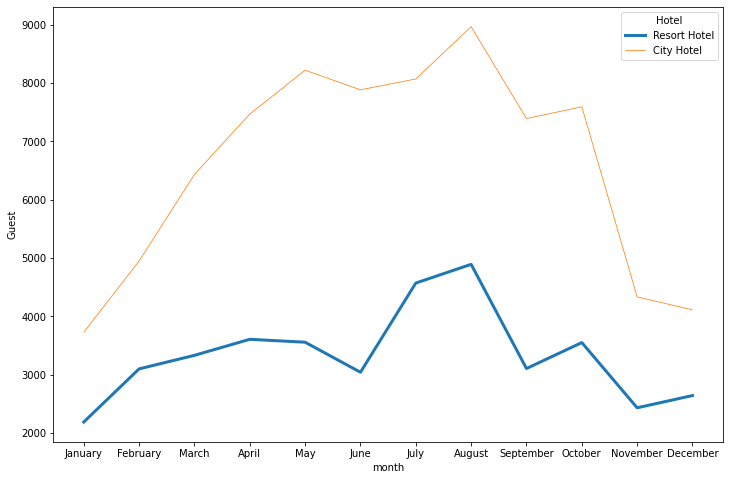

In [ ]:
guests_both_hotels_df["month"]=pd.Categorical(guests_both_hotels_df["month"],categories=months,ordered=True)

plt.figure(figsize=(12,8))
sns.lineplot(data=guests_both_hotels_df,x="month",y="Guest",hue="Hotel",size="Hotel",ci="sd")
plt.show()

City hotel has more guest than the Ridge Hotel, but both of them have most of their guest coming in during summer.

Prices are low during this time and people make good use of it by booking.

Despite prices being high in May, we see alot of people patronizing also for the city hotel.

Meanwhile for the Resort Hotel, prices are high during the summer, yet they have the highest number of guest during this period

In [ ]:
hotel_df_hm.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().unstack()

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,NaN,3883.0,2913.0,NaN,NaN,2774.0,NaN,NaN,NaN,2337.0,4951.0,5109.0
2016,5425.0,5055.0,3846.0,3884.0,2248.0,4560.0,5290.0,4819.0,5475.0,4434.0,6196.0,5391.0
2017,5653.0,4923.0,NaN,4168.0,3673.0,5310.0,5639.0,4949.0,6305.0,NaN,NaN,NaN


# How long do people stay in the hotel?

In [ ]:
No_days_df=DataFrame(BKD_HTL_df[BKD_HTL_df['hotel']=='City Hotel']['days_status_change'].value_counts(normalize=True)*100).reset_index()
No_days_df['Hotel']='City Hotel'
No_days_df=No_days_df.rename(columns={'index':'Days','days_status_change':'%Guests'})

No_days_df_RH=DataFrame(BKD_HTL_df[BKD_HTL_df['hotel']=='Resort Hotel']['days_status_change'].value_counts(normalize=True)*100).reset_index()
No_days_df_RH['Hotel']='Resort Hotel'
No_days_df_RH=No_days_df_RH.rename(columns={'index':'Days','days_status_change':'%Guests'})


frames=[No_days_df,No_days_df_RH]
guests_both_hotels_stay=pd.concat(frames,ignore_index=True,axis=0)


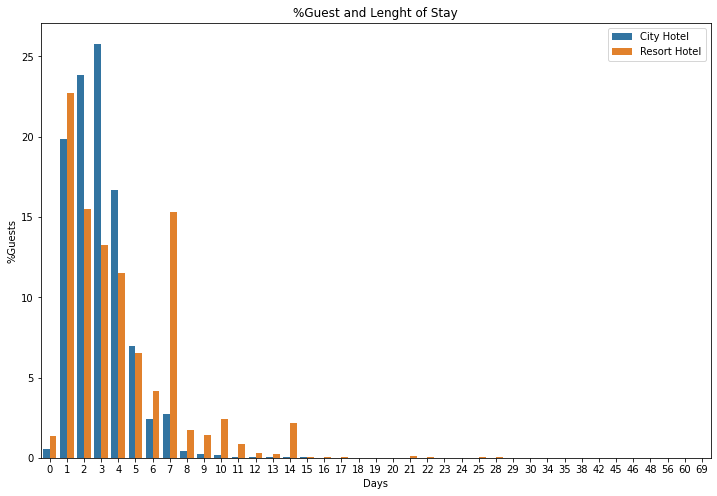

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=guests_both_hotels_stay,x="Days",y="%Guests",hue="Hotel")
plt.legend(loc="upper right")
plt.title("%Guest and Lenght of Stay")
plt.style.use('ggplot')
plt.show()

For the City Hotel, over 25% of the guest spend 4 days Averagely,most of the guest in city Hotel spend between 2 to 3 days in the City Hotel.

For Resort Hotel, over 20% of the guests spend 2days and an average of 3 to 4 days is spent by most guest in the Resort Hotel

# Bookings by market segment

column we will use is the market_segment


In [ ]:
BKD_HTL_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arr_date_month_num,arrival_date,days_status_change,Room_Per_night_fee
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,2,49.0


In [ ]:
DataFrame(df_RH[df_RH['is_canceled']==0]['market_segment'].value_counts()).reset_index()

,index,market_segment
0,Online TA,11481
1,Offline TA/TO,6334
2,Direct,5632
3,Groups,3358
4,Corporate,1954
5,Complementary,168


In [ ]:
BKD_countries_RH_mktseg=DataFrame(df_RH[df_RH['is_canceled']==0]['market_segment'].value_counts()).reset_index().rename(columns={'index':'market_segment','market_segment':'No_Guest'})
CND_countries_RH_mktseg=DataFrame(df_RH[df_RH['is_canceled']==1]['market_segment'].value_counts()).reset_index().rename(columns={'index':'market_segment','market_segment':'No_Guest'})
BKD_countries_CH_mktseg=DataFrame(df_CH[df_CH['is_canceled']==0]['market_segment'].value_counts()).reset_index().rename(columns={'index':'market_segment','market_segment':'No_Guest'})
CND_countries_CH_mktseg=DataFrame(df_CH[df_CH['is_canceled']==1]['market_segment'].value_counts()).reset_index().rename(columns={'index':'market_segment','market_segment':'No_Guest'})

In [ ]:
fig=px.pie(BKD_countries_RH_mktseg,values='No_Guest',names='market_segment',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
fig=px.pie(CND_countries_RH_mktseg,values='No_Guest',names='market_segment',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
fig=px.pie(BKD_countries_CH_mktseg,values='No_Guest',names='market_segment',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
fig=px.pie(CND_countries_CH_mktseg,values='No_Guest',names='market_segment',template="seaborn")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
RM_Mktsg_df=BKD_HTL_df[['hotel','market_segment','reserved_room_type','Room_Per_night_fee']]

fig = px.box(RM_Mktsg_df, x="reserved_room_type", y="Room_Per_night_fee",
             color="market_segment",title="Expenditure per person by room booked and meal eaten")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Groups pay less for a room compared to aviation which pays more

# How many bookings were canceled?

In [ ]:
hotel_df_hm['is_canceled'].count()

119210

In [ ]:
total_cancel=hotel_df_hm[hotel_df_hm['is_canceled']==1]['is_canceled'].sum()
CH_cancel=df_CH[df_CH['is_canceled']==1]['is_canceled'].sum()
RH_cancel=df_RH[df_RH['is_canceled']==1]['is_canceled'].sum()

total_book=hotel_df_hm['is_canceled'].count()
total_CH_book=df_CH['is_canceled'].count()
total_RH_book=df_RH['is_canceled'].count()

print('Total Number of booking cancelled is: {},({:.2f}) %'.format(total_cancel,(total_cancel/total_book)*100))
print('Total Number of City Hotel booking cancelled is: {},({:.2f}) %'.format(CH_cancel,(CH_cancel/total_CH_book)*100))
print('Total Number of Ridge Hotel booking cancelled is: {},({:.2f}) %'.format(RH_cancel,(RH_cancel/total_RH_book)*100))

Total Number of booking cancelled is: 44199,(37.08) %
Total Number of City Hotel booking cancelled is: 33079,(41.79) %
Total Number of Ridge Hotel booking cancelled is: 11120,(27.77) %


# Which month have the highest number of cancelations?


In [ ]:
CND_GUEST_MONTH=DataFrame(hotel_df_hm[hotel_df_hm['is_canceled']==1]['arrival_date_month'].value_counts()).reset_index()
CND_GUEST_MONTH=CND_GUEST_MONTH.rename(columns={'index':'Month','arrival_date_month':'Guests'})

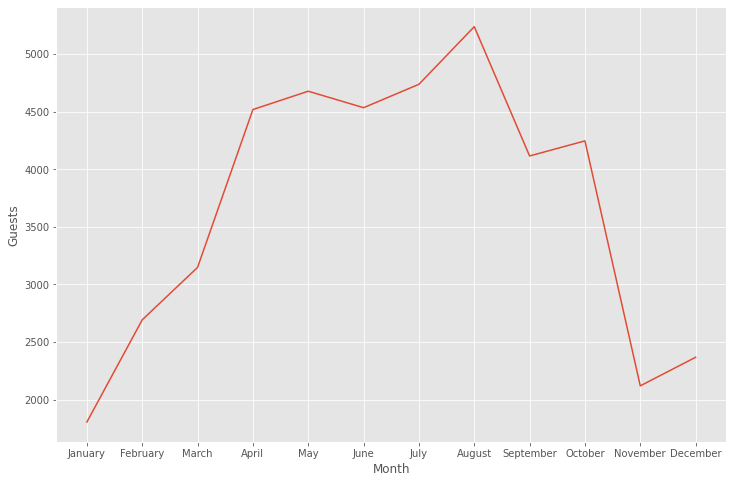

In [ ]:
CND_GUEST_MONTH["Month"]=pd.Categorical(CND_GUEST_MONTH["Month"],categories=months,ordered=True)

plt.figure(figsize=(12,8))
sns.lineplot(data=CND_GUEST_MONTH,x="Month",y="Guests")
plt.show()

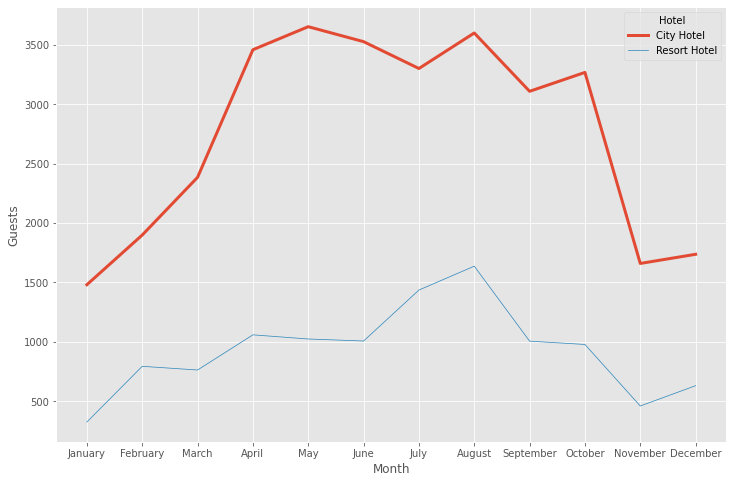

In [ ]:
CND_CITY_HTL=DataFrame(df_CH[df_CH['is_canceled']==1].groupby(['arrival_date_month'])['is_canceled'].count()).reset_index()
CND_CITY_HTL=CND_CITY_HTL.rename(columns={'is_canceled':'Guests','arrival_date_month':'Month'})
CND_CITY_HTL['Hotel']="City Hotel"

#CND_CITY_HTL.head()

CND_RST_HTL=DataFrame(df_RH[df_RH['is_canceled']==1].groupby(['arrival_date_month'])['is_canceled'].count()).reset_index()
CND_RST_HTL=CND_RST_HTL.rename(columns={'is_canceled':'Guests','arrival_date_month':'Month'})
CND_RST_HTL['Hotel']="Resort Hotel"

frames=[CND_CITY_HTL,CND_RST_HTL]
both_hotels_CND_df=pd.concat(frames,ignore_index=True,axis=0)

#CND_CITY_HTL.head()
#both_hotels_CND_df.head()


both_hotels_CND_df["Month"]=pd.Categorical(both_hotels_CND_df["Month"],categories=months,ordered=True)


plt.figure(figsize=(12,8))
sns.lineplot(data=both_hotels_CND_df,x="Month",y="Guests",hue="Hotel",size="Hotel",ci="sd")
plt.show()

#both_hotels_CND_df.tail()

In General the highest month with cancellation is August which is around summer.

Over 37% people cancel their booking around this time.

For city Hotels, May has the highest cancellation despite it's the month were the rate for a room per person is high, Hence makes a lot of sense to have more cancellation on this day.

For Resort Hotels, the monthe with the highest cancellation is August which turns out yo be the month with most visitors and month with highest amount per person

From here we can see that cancellation has a direct correlation with amount spent per day 

In [ ]:
CND_hotel_df=hotel_df_hm[hotel_df_hm['is_canceled']==1]

In [ ]:
CND_hotel_df['Room_Per_night_fee']=CND_hotel_df['adr']/(CND_hotel_df['adults']+ CND_hotel_df['children'])

<ipython-input-71-4273103cfbba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
RM_Mktsg_df_CND=CND_hotel_df[['hotel','market_segment','reserved_room_type','Room_Per_night_fee']]

fig = px.box(RM_Mktsg_df_CND, x="reserved_room_type", y="Room_Per_night_fee",
             color="market_segment",title="Expenditure per person by room booked and meal eaten")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

# Part 2 ML MODELING 

Now let's see how they correlate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [ ]:


train_set,test_set=train_test_split(hotel_df_hm,random_state=42,test_size=0.2)

In [ ]:
hotel_df=train_set.copy()

In [ ]:
hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arr_date_month_num,arrival_date,days_status_change
8930,Resort Hotel,1,386,2016,October,43,20,1,3,2,0.0,0,BB,PRT,Groups,Corporate,0,0,0,A,A,0,No Deposit,0.0,0.0,0,Transient-Party,49.00,0,0,Canceled,2016-09-14,10,2016-10-20,-36
85789,City Hotel,0,5,2016,March,12,19,2,1,2,0.0,0,BB,USA,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,93.33,0,0,Check-Out,2016-03-22,3,2016-03-19,3


Now let's check the correlation

In [ ]:
hotel_df_corr=hotel_df.corr()

corr_df=DataFrame(hotel_df_corr['is_canceled'].abs().sort_values(ascending=False))

<AxesSubplot:>

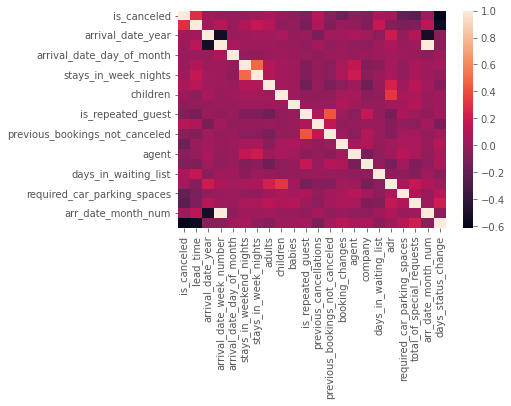

In [ ]:
sns.heatmap(hotel_df_corr)

Now we need to split our data to numeric data and categorical data.

For numeric data you know we will use the simple imputer to clean them up

With categorical we will use the Encoder.

Also our Label has already been Encoded for us so no need for Label Enconder


In [ ]:
hotel_df.groupby(['is_canceled'])['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             60053
1            Canceled              34339
             No-Show                 976
Name: reservation_status, dtype: int64

In [ ]:
corr_df=corr_df.reset_index().rename(columns={'index':'corr_val'})

In [ ]:
cols=corr_df['corr_val'].unique()
hotel_df[cols].head().columns

Index(['is_canceled', 'days_status_change', 'lead_time',
       'total_of_special_requests', 'required_car_parking_spaces',
       'booking_changes', 'previous_cancellations', 'is_repeated_guest',
       'company', 'previous_bookings_not_canceled', 'adults',
       'days_in_waiting_list', 'agent', 'adr', 'babies',
       'stays_in_week_nights', 'arrival_date_year', 'arr_date_month_num',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'children',
       'stays_in_weekend_nights'],
      dtype='object')

In [ ]:
hotel_df[cols].head(2)

,is_canceled,days_status_change,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,company,previous_bookings_not_canceled,adults,days_in_waiting_list,agent,adr,babies,stays_in_week_nights,arrival_date_year,arr_date_month_num,arrival_date_week_number,arrival_date_day_of_month,children,stays_in_weekend_nights
8930,1,-36,386,0,0,0,0,0,0.0,0,2,0,0.0,49.00,0,3,2016,10,43,20,0.0,1
85789,0,3,5,0,0,0,0,0,0.0,0,2,0,1.0,93.33,0,1,2016,3,12,19,0.0,2


In [ ]:
hotel_df.select_dtypes(include="number").columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arr_date_month_num',
       'days_status_change'],
      dtype='object')

In [ ]:
hotel_df.select_dtypes(include="object").columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

# Feature Selection:

We could have just used all the data for our ML Model,

but the truth is some of our Data will leak, more over 

we want to build a generic model irrespective of time,

country and etc. so we will need to hand pick some numerical and categorical columns for our model

In [ ]:
numeric_cols=['lead_time','arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','is_repeated_guest','previous_cancellations',
       'previous_bookings_not_canceled','agent', 'company','adr', 'required_car_parking_spaces',
       'total_of_special_requests']

cat_cols=['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type','deposit_type', 'customer_type']

In [ ]:
hotel_df_actual=hotel_df[numeric_cols + cat_cols]
hotel_df_y=hotel_df['is_canceled']

In [ ]:
hotel_df_actual.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,95368.0,104.237690,106.956238,0.00,18.0,69.00,161.0,737.0
arrival_date_week_number,95368.0,27.148163,13.607913,1.00,16.0,28.00,38.0,53.0
arrival_date_day_of_month,95368.0,15.800971,8.779034,1.00,8.0,16.00,23.0,31.0
stays_in_weekend_nights,95368.0,0.926191,0.995547,0.00,0.0,1.00,2.0,19.0
stays_in_week_nights,95368.0,2.500325,1.898452,0.00,1.0,2.00,3.0,50.0
adults,95368.0,1.859943,0.567654,0.00,2.0,2.00,2.0,50.0
children,95368.0,0.103557,0.397377,0.00,0.0,0.00,0.0,10.0
babies,95368.0,0.008001,0.095342,0.00,0.0,0.00,0.0,10.0
is_repeated_guest,95368.0,0.031604,0.174944,0.00,0.0,0.00,0.0,1.0
previous_cancellations,95368.0,0.086318,0.832202,0.00,0.0,0.00,0.0,26.0


numerice pipeline

Here we will replace all missing values in the numerical one

then we will do same for the categorical, also we need to change the values in categorical to numerical values

In [ ]:
hotel_df_actual.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
8930,386,43,20,1,3,2,0.0,0,0,0,0,0.0,0.0,49.00,0,0,Resort Hotel,October,BB,Groups,Corporate,A,No Deposit,Transient-Party
85789,5,12,19,2,1,2,0.0,0,0,0,0,1.0,0.0,93.33,0,0,City Hotel,March,BB,Groups,TA/TO,A,No Deposit,Transient-Party
17353,270,40,28,3,7,2,0.0,0,0,0,0,95.0,0.0,52.00,0,0,Resort Hotel,September,BB,Direct,Direct,A,No Deposit,Transient
101602,12,46,11,2,2,2,0.0,0,0,0,0,7.0,0.0,86.40,0,3,City Hotel,November,BB,Online TA,TA/TO,A,No Deposit,Transient
67963,20,19,10,0,2,1,0.0,0,0,0,0,0.0,452.0,110.00,0,0,City Hotel,May,BB,Corporate,Corporate,D,No Deposit,Transient-Party


In [ ]:
num_transformer=SimpleImputer(strategy="constant",fill_value=0)

#num_transformer.fit_transform(hotel_df[numeric_cols])
cat_transformer=Pipeline([('imputer',SimpleImputer(strategy="constant")),('ordinal',OrdinalEncoder())])

#combine the two so we can use it for other data sets

col_trans=ColumnTransformer([("num",num_transformer,numeric_cols),("cat",cat_transformer,cat_cols)])



In [ ]:
col_trans

ColumnTransformer(transformers=[('num',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['lead_time', 'arrival_date_week_number',
                                  'arrival_date_day_of_month',
                                  'stays_in_weekend_nights',
                                  'stays_in_week_nights', 'adults', 'children',
                                  'babies', 'is_repeated_guest',
                                  'previous_cancellations',
                                  'previous_bookings_not_canceled', 'agent',
                                  'company', 'adr',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['hotel', 'arrival_date_month', 'meal',
                                  'market_segment', 'distribution_channel',
                                  'reserved_room_type', 'deposit_type',
                                  'customer_type'])])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(hotel_df_actual,hotel_df_y,test_size=0.2,random_state=42,stratify=hotel_df_y)

In [ ]:
model=LogisticRegression(random_state=42,n_jobs=-1)

model_steps=Pipeline([('col_trans',col_trans),('model',model)])

model_steps.fit(X_train,y_train)

y_pred=model_steps.predict(X_test)

model_steps.score(X_test,y_test)

0.7535912760826255

In [ ]:
cv_results=cross_val_score(model_steps,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')



In [ ]:
cv_results

array([       nan, 0.76053477, 0.75660266, 0.75535749, 0.75953598])

In [ ]:
cv_results=[x for x in cv_results if str(x) !="nan"]
np.mean(cv_results)

0.7580077255387169

So now we want have our base model, now let's choose the models we want to use then work on those

In [ ]:
clf1=LogisticRegression(penalty='l2',C=0.001,random_state=42)
clf2=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
clf3=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
clf4=xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=4,random_state=1,use_label_encoder=False)

models_name=['Logisstic Reg','Decision Tree','RandomForest','XGB']

for clf,name in zip([clf1,clf2,clf3,clf4],models_name):
  model_steps=Pipeline([('col_trans',col_trans),('model',clf)])
  scores=cross_val_score(model_steps,X_train,y_train,cv=4,n_jobs=-1,scoring="accuracy")
  scores=[x for x in scores if str(x) !="nan"]
  print('accuracy:{:.2f},{}'.format(np.mean(scores),name))


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



accuracy:0.76,Logisstic Reg
accuracy:0.77,Decision Tree
accuracy:0.86,RandomForest


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



accuracy:0.81,XGB


Our Best Model is Random Forest, so let's take that and do some hyperparameter tunning on it 

In [ ]:
RF=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)

model=Pipeline([('col_trans',col_trans),('model',RF)])

model.fit(X_train,y_train)

model.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(transformers=[('num',
                                    SimpleImputer(fill_value=0,
                                                  strategy='constant'),
                                    ['lead_time', 'arrival_date_week_number',
                                     'arrival_date_day_of_month',
                                     'stays_in_weekend_nights',
                                     'stays_in_week_nights', 'adults', 'children',
                                     'babies', 'is_repeated_guest',
                                     'previous_cancellations',
                                     'previous_bookings_not_canceled', 'agent',
                                     'company', 'adr',
                                     'required_car_parking_spaces',
                                     'total_of_special_requests']),
                                   ('cat',
                                    Pipeline(s

In [ ]:
clf3=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
model=Pipeline([('col_trans',col_trans),('model',clf3)])

param_range=[100,160]
#param_criterion=['gini','entropy']
param_grids=[{'model__n_estimators':param_range,'model__criterion':['entropy']}]
             #{'model__n_estimators':param_range,'model__criterion':['entropy'],'model__min_samples_split':param_min_samples_split}]

gs=GridSearchCV(estimator=model,param_grid=param_grids,scoring='accuracy',cv=10,refit=True,n_jobs=-1)

gs=gs.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan]



In [ ]:
print(gs.best_estimator_)

print(gs.best_score_)

print(gs.best_params_)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
     

In [ ]:
clf3=RandomForestClassifier(n_estimators=160,max_features=0.4,min_samples_split=2,n_jobs=-1,random_state=42)
model_clf=Pipeline([('col_trans',col_trans),('model',clf3)])

cv_result_score=cross_val_score(model_clf,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
cv_result_score=[x for x in cv_result_score if str(x) !="nan"]

np.mean(cv_result_score)

0.8615711846804464

In [290]:
model_clf.fit(X_train,y_train)

#.get_feature_names(input_features=cat_cols)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent', 'c...
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('model',
                 RandomForestClassifier(max_features=0.4, n_estimators=160,
                                        n_jobs=-1, random_state=42))])

In [268]:
model_clf.steps[1][1].feature_importances_

,0
0,0.155016
1,0.061593
2,0.072063
3,0.026237
4,0.042898
5,0.015579
6,0.007171
7,0.001195
8,0.001225
9,0.047721


In [263]:
num=model_clf.named_steps['col_trans'].transformers_[0][2]
#['col_trans'].transformers_[1][1].named_steps['ordinal'].get_feature_names(cat_cols)

In [264]:
cat=model_clf.named_steps['col_trans'].transformers_[1][2]

In [265]:
featuers=num+cat

In [273]:
feat=DataFrame(featuers)
weight=DataFrame(model_clf.steps[1][1].feature_importances_)

imp_df=pd.concat([feat,weight],axis=1,keys=['Feature','Weight'])

In [279]:
imp_df=imp_df.droplevel(1,axis=1)

In [285]:
imp_df.sort_values("Weight",ascending=False).head(10)

,Feature,Weight
22,deposit_type,0.176213
0,lead_time,0.155016
13,adr,0.103556
2,arrival_date_day_of_month,0.072063
1,arrival_date_week_number,0.061593
15,total_of_special_requests,0.057938
11,agent,0.049477
19,market_segment,0.048141
9,previous_cancellations,0.047721
4,stays_in_week_nights,0.042898


In [287]:
X_valid=test_set[numeric_cols + cat_cols]
y_valid=test_set['is_canceled']


#hotel_df_actual=hotel_df[numeric_cols + cat_cols]
#hotel_df_y=hotel_df['is_canceled']

In [292]:


from sklearn.metrics import confusion_matrix
model_clf.fit(X_train,y_train)
ypred=model_clf.predict(X_valid)
confmat=confusion_matrix(y_valid,ypred)
print(confmat)

[[13839  1119]
 [ 2104  6780]]


Text(28.5, 0.5, 'Actual Label')

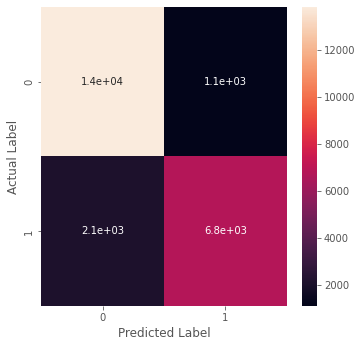

In [293]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(5.5,5.5))
sns.heatmap(confmat,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [294]:
from sklearn.metrics import auc,accuracy_score

In [296]:
model_clf.fit(X_train,y_train)
ypred=model_clf.predict(X_valid)
accuracy_score(y_valid,ypred)

0.8648183877191511

So we have our final Model to help Hotels make predictions

the 3 most inportant features are deposit_type,
,lead_time,adr

Now we can deploy our model.